In [1]:
%matplotlib widget

# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [2]:
import numpy as np

## Define a function that creates some statistical data

In [3]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))
    return positions, heights

## Read the data

In [4]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [5]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [6]:
print(len(positions))
print(len(heights))

100
100


## Convert to numpy arrays

In [7]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [8]:
print(np_positions.dtype)
print(np_heights.dtype)
print(np_positions.shape)
print(np_heights.shape)

<U2
float64
(100,)
(100,)


## Extract the heights of the goalkeepers

In [9]:
gk_heights = np_heights[np_positions == 'GK']

## Print the median of the goalkeepers heights

In [10]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 180.0765760973905


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [11]:
field_heights = np_heights[np_positions != 'GK']
print("Median height of all field players: " + str(np.median(field_heights)))

atk_heights = np_heights[np_positions == 'A']
print("Median height of all the attackers: " + str(np.median(atk_heights)))

gk_and_atk_heights = np_heights[(np_positions == 'GK') + (np_positions == 'A')]
print("Median height of goalkeepers and attackers combined: " + str(np.median(gk_and_atk_heights)))

Median height of all field players: 179.8824734755899
Median height of all the attackers: 179.9879935090447
Median height of goalkeepers and attackers combined: 180.0322848032176


## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [12]:
tallest_value = 0
for position in ['GK', 'D', 'M', 'A']:
    tval = np.amax(np_heights[np_positions == position])
    if tval > tallest_value:
        tallest_value = tval
        tallest_position = position
shortest_value = tallest_value
for position in ['GK', 'D', 'M', 'A']:
    sval = np.amin(np_heights[np_positions == position])
    if sval < shortest_value:
        shortest_value = sval
        shortest_position = position
    
print("The shortest player plays in the {} position".format(shortest_position))
print("The tallest player plays in the {} position".format(tallest_position))

The shortest player plays in the GK position
The tallest player plays in the A position


In [13]:
print("Shortest GK:", np.amax(np_heights[np_positions == 'GK']))
print("Shortest A:", np.amax(np_heights[np_positions == 'A']))
print("Shortest D:", np.amax(np_heights[np_positions == 'D']))
print("Shortest M:", np.amax(np_heights[np_positions == 'M']))
print("\n")
print("Tallest GK:", np.amin(np_heights[np_positions == 'GK']))
print("Tallest A:", np.amin(np_heights[np_positions == 'A']))
print("Tallest D:", np.amin(np_heights[np_positions == 'D']))
print("Tallest M:", np.amin(np_heights[np_positions == 'M']))

Shortest GK: 191.45005829725702
Shortest A: 192.0827238591128
Shortest D: 190.91765045334637
Shortest M: 188.56920479484432


Tallest GK: 168.8608858620835
Tallest A: 171.82844751231033
Tallest D: 172.10836289639772
Tallest M: 170.17902997488278


## Data plotting

For plotting, we need the package matplotlib

In [14]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [15]:
# For inline plots use
%matplotlib inline

In [16]:
# For inline plots with interactive capabilities use
%matplotlib notebook

Lets visualize the height distribution of the defenders

In [17]:
d_heights = np_heights[np_positions == 'D']

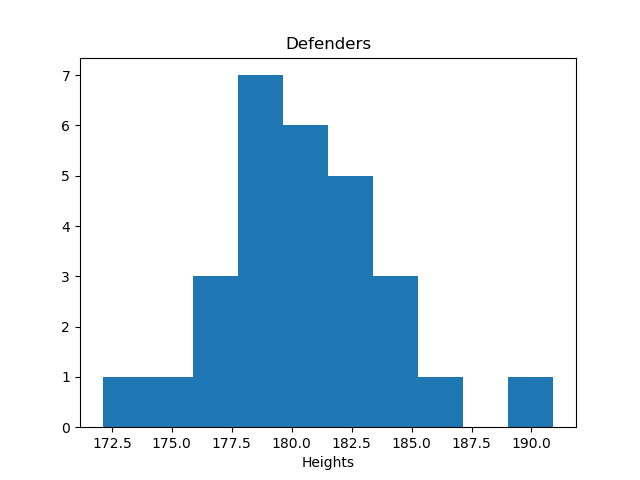

In [18]:
import IPython
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can the max/min within each position

In [19]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

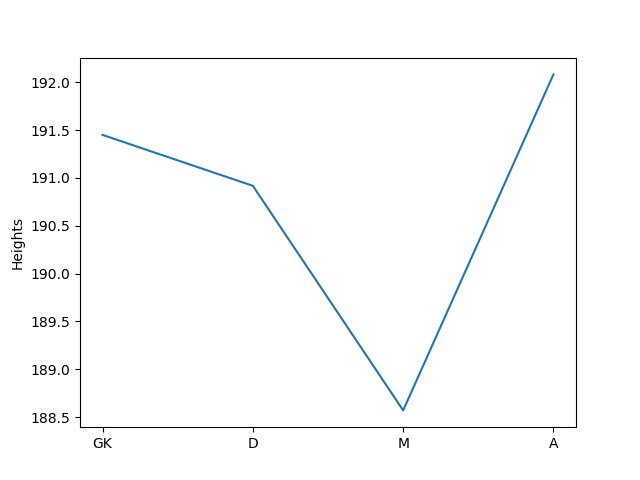

In [20]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)